In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
accident_data = pd.read_csv("Road Accident Data.csv")
accident_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

## Cleaning Data

In [64]:
# Check for missing values
missing_values = accident_data.isnull().sum()
missing_df = pd.DataFrame({
    "Missing Count": missing_values
}).sort_values("Missing Count", ascending=False)

missing_df.head()

,Missing Count
Carriageway_Hazards,302549
Time,17
Accident_Index,0
Number_of_Casualties,0
Weather_Conditions,0


In [65]:
# Filling in the missing values
accident_data["Carriageway_Hazards"].unique()
accident_data["Carriageway_Hazards"] = accident_data["Carriageway_Hazards"].fillna("None")

In [66]:
accident_data["Time"].mode()[0]


'17:00'

In [67]:
accident_data["Time"] = accident_data["Time"].fillna("17:00")

In [68]:
# Converting the Datatype

accident_data["Accident Date"] = pd.to_datetime(
                                accident_data["Accident Date"], 
                                format= "%d-%m-%Y")
accident_data["Time"] = pd.to_datetime(
                                accident_data["Time"],
                                format= "%H:%M",
                                errors="coerce").dt.time

In [71]:
# Adding a few columns
accident_data["Year"] = accident_data["Accident Date"].dt.year
accident_data["Year_Month"] = accident_data["Accident Date"].dt.to_period("M").astype(str)
accident_data["Week"] = accident_data["Accident Date"].dt.isocalendar().week

In [107]:
# Replace invalid values 
accident_data["Accident_Severity"] = accident_data["Accident_Severity"].replace("Fetal", "Fatal")

In [70]:
accident_data.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Year_Month,Week
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car,2021,2021-01,53
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car,2021,2021-01,1
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car,2021,2021-01,1
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc,2021,2021-01,1
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car,2021,2021-01,1


## Analysis

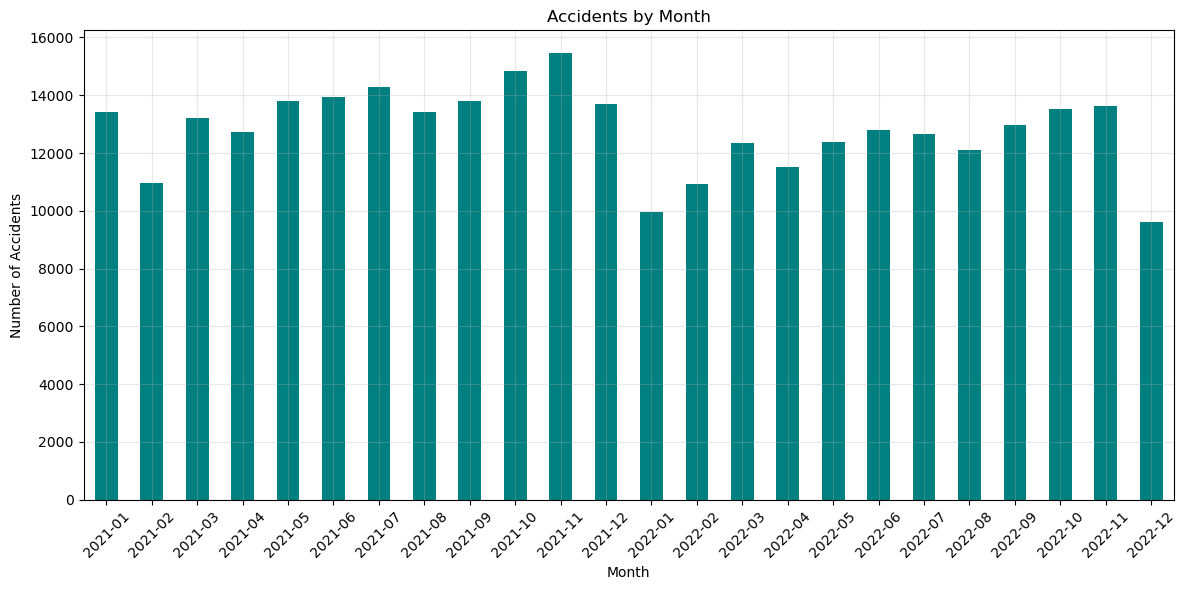

In [85]:
# Accidents by month


monthly_accidents = accident_data.groupby('Year_Month').size()
plt.figure(figsize= (12, 6))
monthly_accidents.plot(kind="bar", color="teal")
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

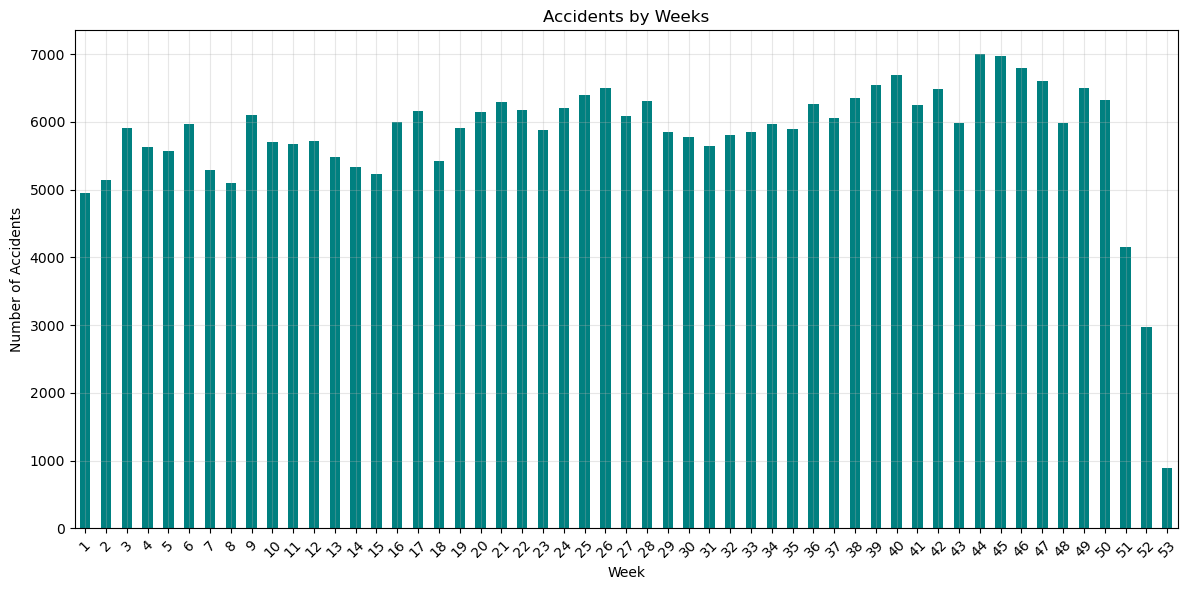

In [90]:
# Accidents by week
weekly_accidents = accident_data.groupby("Week").size()
plt.figure(figsize= (12, 6))
weekly_accidents.plot(kind="bar", color="teal")
plt.title('Accidents by Weeks')
plt.xlabel('Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


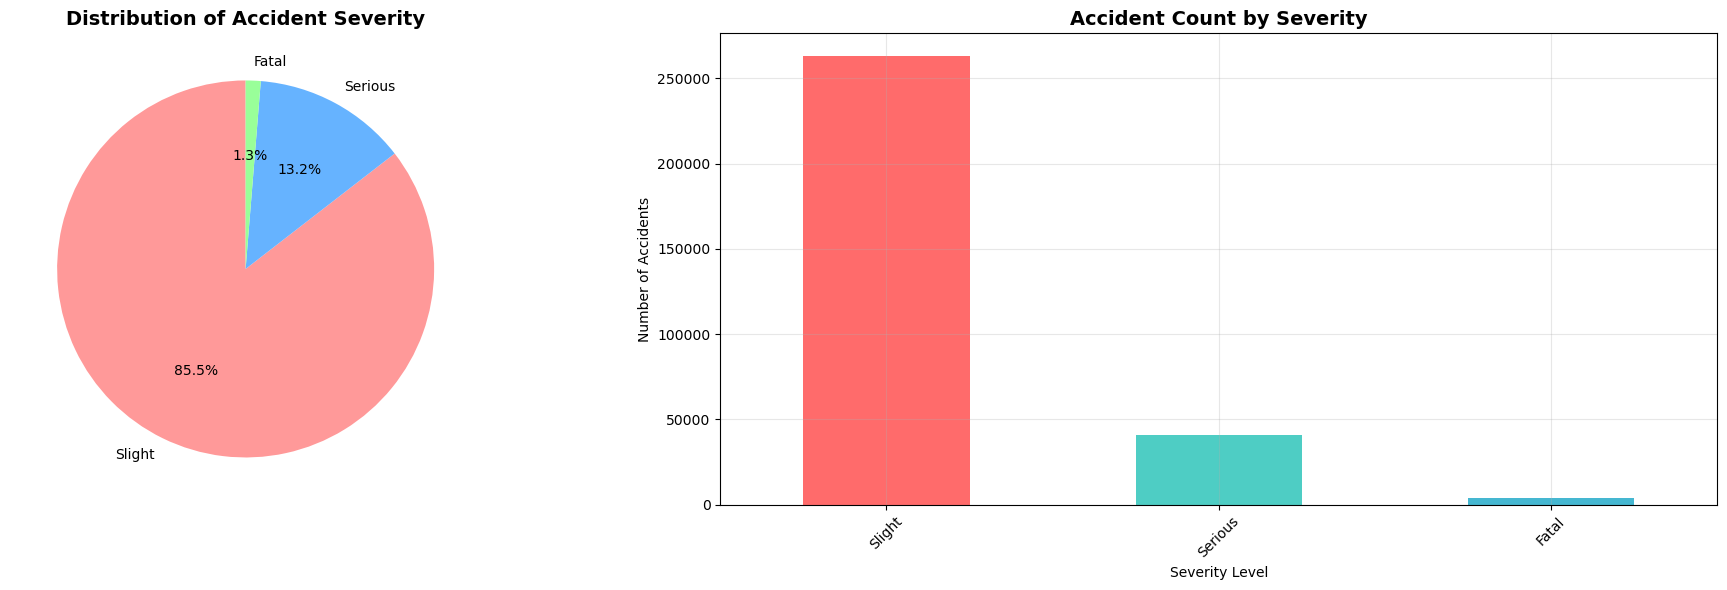

In [108]:
# Severity Analysis


plt.figure(figsize=(20, 6))
    
plt.subplot(1, 2, 1)
severity_counts = accident_data["Accident_Severity"].value_counts()
plt.pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Distribution of Accident Severity", fontsize=14, fontweight='bold')
    
plt.subplot(1, 2, 2)
severity_counts.plot(kind="bar", color=["#ff6b6b", "#4ecdc4", "#45b7d1"])
plt.title("Accident Count by Severity", fontsize=14, fontweight="bold")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Urban vs Rural Accidents')

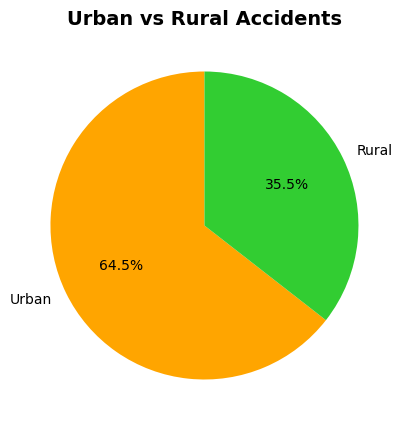

In [109]:
# Urban or Rural

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
area_counts = accident_data['Urban_or_Rural_Area'].value_counts()
plt.pie(area_counts.values, labels=area_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=['#ffa500', '#32cd32'])
plt.title('Urban vs Rural Accidents', fontsize=14, fontweight='bold')

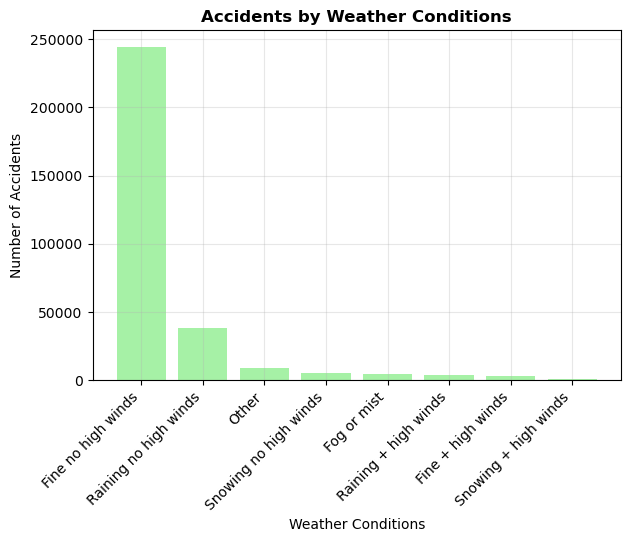

In [112]:

#'Weather_Conditions
    
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
weather_counts = accident_data["Weather_Conditions"].value_counts().head(8)
plt.bar(range(len(weather_counts)), weather_counts.values, color='lightgreen', alpha=0.8)
plt.title('Accidents by Weather Conditions', fontsize=12, fontweight='bold')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(range(len(weather_counts)), weather_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

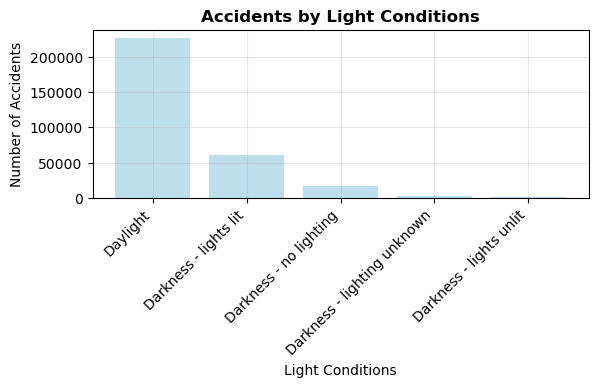

In [118]:
# Light conditions

plt.subplot(2, 1, 2)
light_counts = accident_data['Light_Conditions'].value_counts()
plt.bar(range(len(light_counts)), light_counts.values, color="lightblue", alpha=0.8)
plt.title('Accidents by Light Conditions', fontsize=12, fontweight='bold')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(range(len(light_counts)), light_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

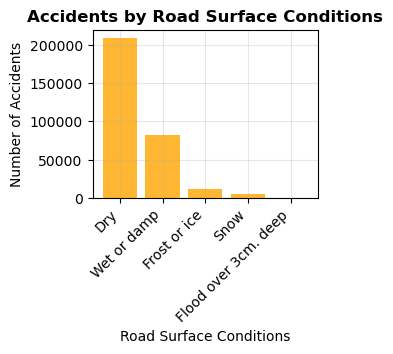

In [119]:
plt.subplot(2, 2, 3)
surface_counts = accident_data['Road_Surface_Conditions'].value_counts().head(6)
plt.bar(range(len(surface_counts)), surface_counts.values, color='orange', alpha=0.8)
plt.title('Accidents by Road Surface Conditions', fontsize=12, fontweight='bold')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(range(len(surface_counts)), surface_counts.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3)

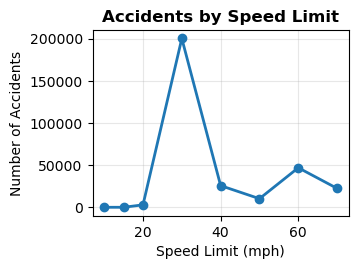

In [120]:
# Speed limit analysis
plt.subplot(2, 2, 4)
speed_counts = accident_data['Speed_limit'].value_counts().sort_index()
plt.plot(speed_counts.index, speed_counts.values, marker='o', linewidth=2, markersize=6)
plt.title('Accidents by Speed Limit', fontsize=12, fontweight='bold')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Number of Accidents')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()